In [1]:
import tensorflow as tf
from tensorflow.keras import layers , models 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
##load 
(train_images , train_labels) , (test_images , test_labels) = mnist.load_data()

In [3]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
train_labels[0:8] 

array([5, 0, 4, 1, 9, 2, 1, 3], dtype=uint8)

In [5]:
def image_show(train_image,train_label,number):
    plt.imshow(train_image[number])
    plt.title(train_label[number])
    plt.show()

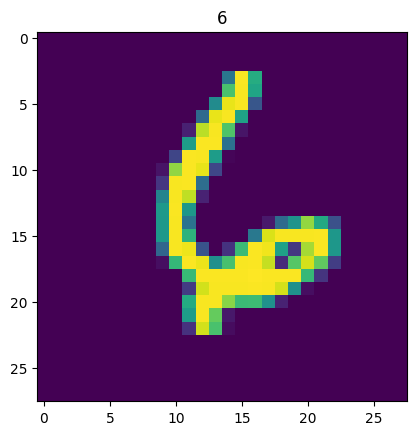

In [11]:
image_show(train_images,train_labels,59000)

In [12]:
#normalization -- pixel value range between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [13]:
##expand dimensions to add a channel(for gray scale image)
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

In [14]:
train_images.shape, train_labels.shape

((60000, 28, 28, 1), (60000,))

In [15]:
##one hot encoding -- to categorical 
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:
##model define 
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#32 basically no of filter
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

##comile the model 
model.compile(optimizer='adam'
              ,loss='categorical_crossentropy'
              ,metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(train_images,
                    train_labels,
                    epochs = 5 ,
                    batch_size = 64,
                    validation_data = (test_images,test_labels),
                    validation_split = 0.1)

# Batch Size refers to the number of training
# samples processed at once before the model's weights are updated.

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.8656 - loss: 0.4308 - val_accuracy: 0.9842 - val_loss: 0.0526
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9851 - loss: 0.0485 - val_accuracy: 0.9863 - val_loss: 0.0397
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9884 - loss: 0.0370 - val_accuracy: 0.9877 - val_loss: 0.0359
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9913 - loss: 0.0272 - val_accuracy: 0.9895 - val_loss: 0.0320
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9926 - loss: 0.0217 - val_accuracy: 0.9897 - val_loss: 0.0336


In [19]:
#testing data check 
test_loss,test_acc = model.evaluate(test_images,test_labels)
print('test accuracy :',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9868 - loss: 0.0427
test accuracy : 0.9897000193595886


In [21]:
##predictions 
predictions = model.predict(test_images)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([2.7918082e-07, 1.0535190e-06, 6.5458194e-06, 1.8482649e-05,
       1.3112867e-08, 1.2966404e-08, 1.8273123e-11, 9.9996161e-01,
       4.4656051e-07, 1.1575495e-05], dtype=float32)

In [23]:
np.argmax(predictions,axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)